<a href="https://colab.research.google.com/github/rohith4743/machinelearning/blob/main/GenderNeutrality/GenderNeutrality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rohith4743/machinelearning.git
!mv machinelearning/GenderNeutrality/0753aae4bec411eb.zip 0753aae4bec411eb.zip
!rm -r machinelearning
!unzip 0753aae4bec411eb.zip
!rm 0753aae4bec411eb.zip

Cloning into 'machinelearning'...
remote: Enumerating objects: 2046, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 2046 (delta 0), reused 0 (delta 0), pack-reused 2038
Receiving objects: 100% (2046/2046), 107.25 MiB | 37.43 MiB/s, done.
Resolving deltas: 100% (35/35), done.
Archive:  0753aae4bec411eb.zip
  inflating: sample submission.csv   
  inflating: Test.csv                
  inflating: Train.csv               


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [29]:
train_csv = pd.read_csv("Train.csv")
train_csv.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,12,2009,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,2018,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,6,2015,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,6,2015,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,2,2019,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [34]:
dataset = train_csv.copy()
dataset.pop("EmpName")
dataset.pop("EmpID")
dataset = pd.get_dummies(dataset, columns=["LanguageOfCommunication" , "Gender", "JobProfileIDApplyingFor", "HighestDegree", "DegreeBranch", "GraduatingInstitute", "MartialStatus", "CurrentDesignation", "CurrentCompanyType", "DepartmentInCompany"])
dataset.dtypes

Age                                          int64
LatestDegreeCGPA                             int64
YearsOfExperince                             int64
GraduationYear                               int64
CurrentCTC                                   int64
ExpectedCTC                                  int64
EmpScore                                     int64
TotalLeavesTaken                             int64
BiasInfluentialFactor                       object
FitmentPercent                             float64
LanguageOfCommunication_English              uint8
LanguageOfCommunication_Hindi                uint8
LanguageOfCommunication_Native               uint8
Gender_Female                                uint8
Gender_Male                                  uint8
Gender_Other                                 uint8
JobProfileIDApplyingFor_JR70175              uint8
JobProfileIDApplyingFor_JR79193              uint8
JobProfileIDApplyingFor_JR81165              uint8
JobProfileIDApplyingFor_JR85289

In [35]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [36]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels_Filment = train_features.pop('FitmentPercent')
test_labels_Filment  = test_features.pop('FitmentPercent')

train_labels_BiasInfluence = train_features.pop('BiasInfluentialFactor')
test_labels_BiasInfluence = test_features.pop('BiasInfluentialFactor')

In [37]:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization()
normalizer.adapt(train_features)

In [48]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 200])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [42]:
model = tf.keras.Sequential([
      normalizer,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 58)                117       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                3776      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 8,118
Trainable params: 8,001
Non-trainable params: 117
_________________________________________________________________


In [44]:
history = model.fit(train_features, train_labels_Filment, validation_split=0.2, verbose=1, epochs=100)

Epoch 1/100
273/273 [==============================] - 1s 2ms/step - loss: 1866.2007 - val_loss: 161.5786
Epoch 2/100
273/273 [==============================] - 0s 2ms/step - loss: 162.3518 - val_loss: 142.4009
Epoch 3/100
273/273 [==============================] - 0s 2ms/step - loss: 141.8017 - val_loss: 130.0803
Epoch 4/100
273/273 [==============================] - 0s 2ms/step - loss: 127.4310 - val_loss: 121.9179
Epoch 5/100
273/273 [==============================] - 1s 2ms/step - loss: 117.7987 - val_loss: 116.9828
Epoch 6/100
273/273 [==============================] - 1s 2ms/step - loss: 111.7853 - val_loss: 113.2983
Epoch 7/100
273/273 [==============================] - 0s 2ms/step - loss: 107.1180 - val_loss: 111.4764
Epoch 8/100
273/273 [==============================] - 0s 2ms/step - loss: 104.1287 - val_loss: 110.4511
Epoch 9/100
273/273 [==============================] - 0s 2ms/step - loss: 101.5150 - val_loss: 110.2776
Epoch 10/100
273/273 [==============================] 

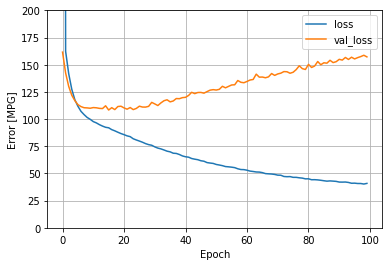

In [49]:
plot_loss(history)